<a href="https://colab.research.google.com/github/C23-PS418/Bicaraku/blob/ML/CNN_Bicaraku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflowjs

In [ ]:
!gdown --id 1OafUwixUVnq_7tdAfh_D8NetXec-46Wa
!gdown --id 17zmAWDVNs3vzSd7u2ZJaxy4G-ZsBix-I
!gdown --id 1dOv1svlhrxYfi-o0Tj1WduBr9pdgjCOs

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1OafUwixUVnq_7tdAfh_D8NetXec-46Wa
To: /content/train_alphabet2.csv
100% 239M/239M [00:01<00:00, 126MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=17zmAWDVNs3vzSd7u2ZJaxy4G-ZsBix-I
To: /content/validation_alphabet2.csv
100% 29.5M/29.5M [00:00<00:00, 154MB/s] 
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://d

In [2]:
import pandas as pd
import tensorflow as tf
import csv
import random

In [3]:
# Shuffle CSV rows

list_datasets = ['train_alphabet2.csv', 'validation_alphabet2.csv', 'test_alphabet2.csv']

for dataset in list_datasets:

  # Read the CSV file
  with open(dataset, 'r') as file:
    reader = csv.reader(file)
    rows = list(reader)

  # Shuffle the rows
  random.shuffle(rows)

  # Write the shuffled rows to a new CSV file
  with open(dataset, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows)

In [16]:
train_df = pd.read_csv('train_alphabet2.csv')
val_df = pd.read_csv('validation_alphabet2.csv')
test_df = pd.read_csv('test_alphabet2.csv')

train_df.head()

,F,53,55,53.1,44,43,47,55.1,71,73,...,39.13,44.25,37.15,38.12,60.30,53.26,47.22,47.23,44.26,49.28
0,C,172,173,173,173,173,174,175,175,177,...,172,171,170,170,171,170,168,167,166,165
1,D,174,175,176,175,176,176,175,174,172,...,142,142,142,141,142,140,141,141,139,137
2,Z,51,70,68,71,80,89,96,100,102,...,92,92,93,93,93,92,92,92,93,80
3,Y,51,69,64,63,59,55,52,50,47,...,22,57,127,124,123,123,123,124,126,106
4,F,174,174,175,176,177,177,176,176,177,...,176,180,181,181,181,179,176,175,173,170


In [17]:
train_label = train_df[train_df.columns[0]]
val_label = val_df[val_df.columns[0]]
test_label = test_df[test_df.columns[0]]

print(train_label.shape)

(25998,)


In [18]:
train_df.drop(columns=train_df.columns[0], axis=1, inplace=True)
val_df.drop(columns=val_df.columns[0], axis=1, inplace=True)
test_df.drop(columns=test_df.columns[0], axis=1, inplace=True)

train_df.head(5)

,53,55,53.1,44,43,47,55.1,71,73,91,...,39.13,44.25,37.15,38.12,60.30,53.26,47.22,47.23,44.26,49.28
0,172,173,173,173,173,174,175,175,177,178,...,172,171,170,170,171,170,168,167,166,165
1,174,175,176,175,176,176,175,174,172,171,...,142,142,142,141,142,140,141,141,139,137
2,51,70,68,71,80,89,96,100,102,99,...,92,92,93,93,93,92,92,92,93,80
3,51,69,64,63,59,55,52,50,47,46,...,22,57,127,124,123,123,123,124,126,106
4,174,174,175,176,177,177,176,176,177,176,...,176,180,181,181,181,179,176,175,173,170


In [19]:
train_data = train_df.values
val_data = val_df.values
test_data = test_df.values

train_data.shape

(25998, 2500)

In [20]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
train_label = label_binarizer.fit_transform(train_label)
val_label = label_binarizer.fit_transform(val_label)
test_label = label_binarizer.fit_transform(test_label)
train_label[:5]

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]])

In [21]:
# Normalize the data
train_data = train_data / 255.0
val_data = val_data / 255.0
test_data = test_data / 255.0

In [22]:
# Reshaping the data from 1-D to 3-D as required through input by CNN's
train_data = train_data.reshape(-1,50,50,1)
val_data = val_data.reshape(-1,50,50,1)
test_data = test_data.reshape(-1,50,50,1)

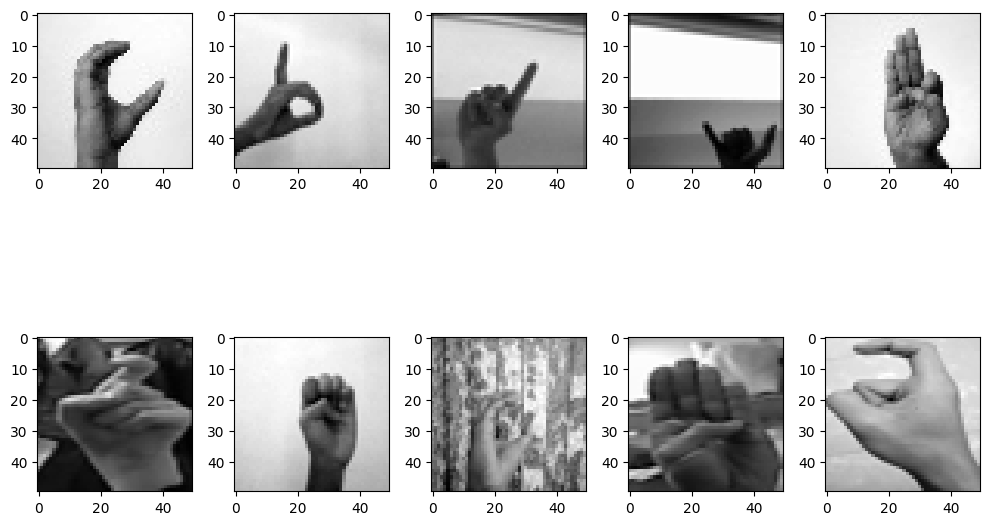

In [23]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(train_data[k].reshape(50, 50), cmap='gray')
        k += 1
    plt.tight_layout()    

In [24]:
# With data augmentation to prevent overfitting

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(train_data)

In [25]:
class AccuracyCallback(tf.keras.callbacks.Callback):
    def __init__(self, target_accuracy):
        super(AccuracyCallback, self).__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy'] >= self.target_accuracy:
            print(f"\nReached target accuracy of {self.target_accuracy*100}%")
            self.model.stop_training = True

In [26]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(125 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (50,50,1)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'),
  tf.keras.layers.Conv2D(100 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'),
  tf.keras.layers.Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units = 512 , activation = 'relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(units = 26 , activation = 'softmax')
])

model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 50, 50, 125)       1250      
                                                                 
 batch_normalization_3 (Batc  (None, 50, 50, 125)      500       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 25, 25, 125)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 25, 25, 100)       112600    
                                                                 
 dropout_2 (Dropout)         (None, 25, 25, 100)       0         
                                                                 
 batch_normalization_4 (Batc  (None, 25, 25, 100)     

In [27]:
# Define your callback
target_accuracy = 0.99
accuracy_callback = AccuracyCallback(target_accuracy)

# Train the model with the callback
history = model.fit(datagen.flow(train_data, train_label, batch_size = 128),
                    epochs = 30, 
                    validation_data = (val_data, val_label),
                    callbacks = [accuracy_callback])

Epoch 1/30
204/204 [==============================] - 21s 92ms/step - loss: 2.4589 - accuracy: 0.3051 - val_loss: 4.2949 - val_accuracy: 0.0388
Epoch 2/30
204/204 [==============================] - 17s 85ms/step - loss: 1.3163 - accuracy: 0.5923 - val_loss: 5.6589 - val_accuracy: 0.0539
Epoch 3/30
204/204 [==============================] - 18s 88ms/step - loss: 0.9174 - accuracy: 0.7126 - val_loss: 1.3879 - val_accuracy: 0.5448
Epoch 4/30
204/204 [==============================] - 18s 87ms/step - loss: 0.6851 - accuracy: 0.7805 - val_loss: 0.4742 - val_accuracy: 0.8563
Epoch 5/30
204/204 [==============================] - 18s 87ms/step - loss: 0.5780 - accuracy: 0.8139 - val_loss: 0.4617 - val_accuracy: 0.8606
Epoch 6/30
204/204 [==============================] - 17s 85ms/step - loss: 0.4796 - accuracy: 0.8495 - val_loss: 0.4023 - val_accuracy: 0.8793
Epoch 7/30
204/204 [==============================] - 18s 86ms/step - loss: 0.3979 - accuracy: 0.8695 - val_loss: 0.6301 - val_accuracy:

In [28]:
print("Accuracy of the model is - " , model.evaluate(val_data,val_label)[1]*100 , "%")

102/102 [==============================] - 1s 7ms/step - loss: 0.1834 - accuracy: 0.9612
Accuracy of the model is -  96.12188339233398 %


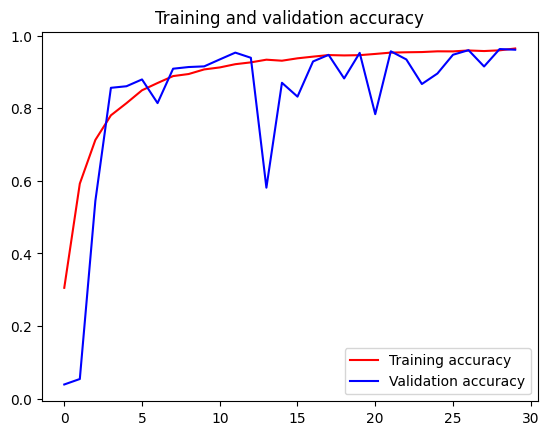

<Figure size 640x480 with 0 Axes>

In [29]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [30]:
predictions = model.predict(test_data)
import numpy as np
print(np.argmax(test_label[:20], axis=1))
print(np.argmax(predictions[:20], axis=1))

102/102 [==============================] - 1s 5ms/step
[ 1 25  7 13 20  9  7 20  6 14  4  5  0 15 10 17 21 15 15  7]
[ 1 25  7 13 20  9  7 20  6 14  4  5  0 15 10 17 21 15 23  7]


<Axes: >

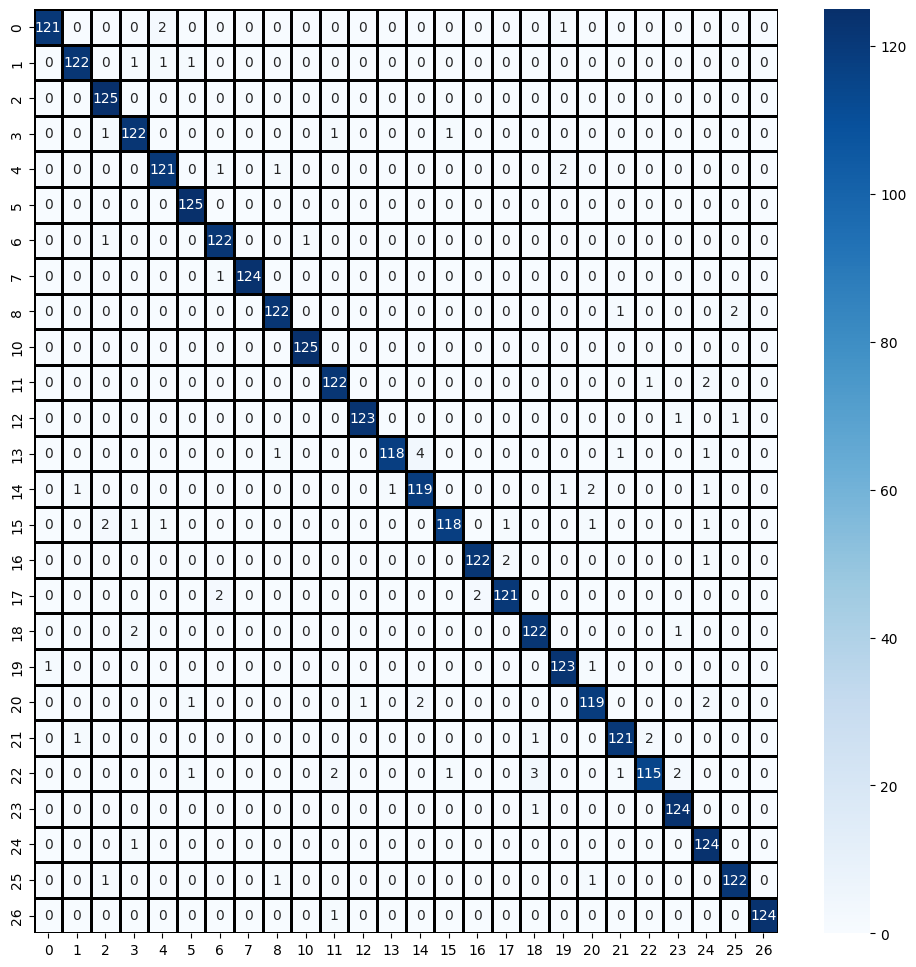

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(np.argmax(test_label, axis=1), np.argmax(predictions, axis=1))
cm = pd.DataFrame(cm , index = [i for i in range(27) if i != 9] , columns = [i for i in range(27) if i != 9])
plt.figure(figsize = (12,12))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [ ]:
#saved_model_path = "./bicaraku.h5"

#model.save(saved_model_path)

In [ ]:
#!tensorflowjs_converter --input_format=keras {saved_model_path} ./

2023-05-24 01:28:13.845409: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
